In [ ]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

This notebook contains the datasets for the problems on the student practice midterm design. Feel free to use it as an extra reference as you work on these problems. 

# Problem 1
Given the table baby names below containing popular baby names between 2011 and
2019, answer the following questions. You may assume the standard imports:

In [4]:
baby_names = Table().read_table('Popular_Baby_Names.csv')
baby_names

Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
2011,FEMALE,HISPANIC,GERALDINE,13,75
2011,FEMALE,HISPANIC,GIA,21,67
2011,FEMALE,HISPANIC,GIANNA,49,42
2011,FEMALE,HISPANIC,GISELLE,38,51
2011,FEMALE,HISPANIC,GRACE,36,53
2011,FEMALE,HISPANIC,GUADALUPE,26,62
2011,FEMALE,HISPANIC,HAILEY,126,8
2011,FEMALE,HISPANIC,HALEY,14,74
2011,FEMALE,HISPANIC,HANNAH,17,71
2011,FEMALE,HISPANIC,HAYLEE,17,71


Between 2013 and 2019, what was the most popular boy’s name, and how many
babies were named this? Filter the table to find out.

In [28]:
male_names_2013_to_2019 = baby_names.where("Year of Birth", are.above_or_equal_to(2013)).where("Gender", "MALE")
total_name_count = male_names_2013_to_2019.group("Child's First Name", sum)
total_name_count.sort("Count sum", descending=True).item(0)

Child's First Name,Year of Birth sum,Gender sum,Ethnicity sum,Count sum,Rank sum
Ethan,126920,,,10664,522


Between 2013 and 2019, what was the most popular girl’s name, and how many
babies were named this? Filter the table to find out.

# Problem 2

Suppose you are given the table pokemon below, complete the following operations.
*NOTE* This is a large table, so not all columns are displayed in the image below.

In [5]:
pokemon = Table().read_table("pokemon.csv")
pokemon

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,nan,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,nan,19,1,0
"['Blaze', 'Solar Power']",0.25,1,1,2,0.5,0.5,0.5,1,1,0.25,0,1,1,1,1,4,0.5,2,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,nan,9,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,nan,22.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,nan,85.5,1,0
"['Shield Dust', 'Run Away']",1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50,10,20,20,45,bug,nan,2.9,1,0


Write some code to get the total amount of each type of pokemon introduced in
each generation(1-7). Use the `type1` column.

In [38]:
pokemon.group(["generation",'type1'])#.pivot("type1",'generation',"count",np.sum)


generation,type1,count
1,bug,12
1,dragon,3
1,electric,9
1,fairy,2
1,fighting,7
1,fire,12
1,ghost,3
1,grass,12
1,ground,8
1,ice,2


In [37]:
pokemon.pivot("type1",'generation')

generation,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
1,12,0,3,9,2,7,12,0,3,12,8,2,22,14,8,9,0,28
2,10,5,0,6,5,2,8,0,1,9,3,4,15,1,7,4,2,18
3,12,4,7,4,0,4,6,0,4,12,6,6,18,3,8,8,9,24
4,8,3,3,7,1,2,5,0,6,13,4,3,17,6,7,6,3,13
5,18,13,7,7,0,7,8,1,5,15,9,6,17,2,14,6,4,17
6,3,3,4,3,9,3,8,2,4,5,0,2,4,2,3,8,4,5
7,9,1,3,3,1,3,5,0,4,12,2,0,12,4,6,4,2,9


For each pokemon type (use the `type1` column), find the average `attack`,`sp_attack`,
`sp_defense`, and `speed`. Produce a bar chart of the results.

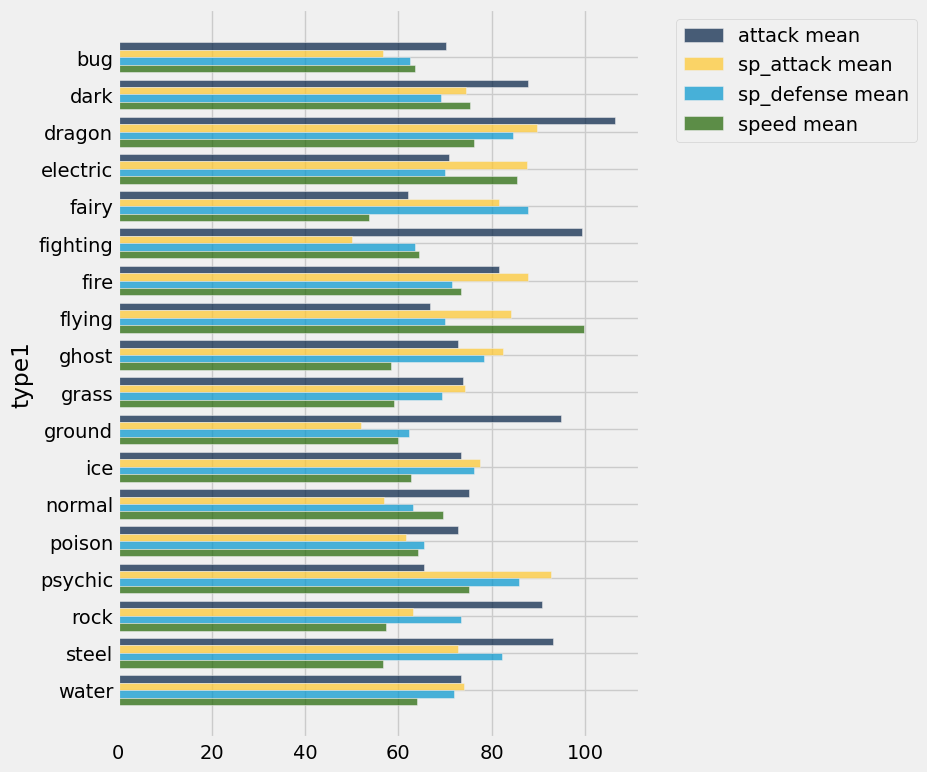

In [41]:
poke_stats = pokemon.select("type1","attack","sp_attack","sp_defense","speed")
poke_stats.group("type1",np.mean).barh("type1")

# Problem 3

You are given a sack of marbles with 20 marbles total, 6 BLUE, 7 GREEN, 4 RED
and 3 YELLOW.
Create a table with two columns color and number containing the number of
marbles of each color.

In [6]:
colors = Table().with_columns(
    "color", make_array("blue", "green", "red", "yellow"),
    "number", make_array(6, 7, 4, 3)
)
colors

color,number
blue,6
green,7
red,4
yellow,3


Write a function that takes two colors and returns the probability of selecting two
marbles with those colors from the sack without replacement. *You may use the
colors table from part (a).*

In [42]:
def chance_of_marbles(color1,color2):
    total_num_marbles = sum(colors.column('number'))
    num_color1_marbles = colors.where('color',color1).column('number').item(0)
    num_color2_marbles = colors.where('color',color2).column('number').item(0)
    if color1 == color2:
        chance = num_color1_marbles/total_num_marbles * (num_color2_marbles-1)/(total_num_marbles -1) 
    else: 
        chance = num_color1_marbles/total_num_marbles * (num_color2_marbles)/(total_num_marbles -1) + num_color2_marbles/total_num_marbles * (num_color1_marbles)/(total_num_marbles -1) 
    return chance

In [44]:
chance_of_marbles('blue','green')

0.22105263157894736

In [49]:
chance_of_marbles('blue','blue')

0.078947368421052627

# Problem 4

The following table `enso` displays El Nino-Southern Oscillation (ENSO) Data. *NOTE*
This is a large table, so not all columns are shown below.

In [21]:
enso = Table.read_table('ENSO.csv')
enso.show(5)

Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
1/1/1950,1950,JAN,-0.2,nan,nan,nan,nan,nan,nan,nan,nan,0.624,-3.65,nan,nan,DJ,nan,DJF,-1.5,1950-1951,ML
2/1/1950,1950,FEB,-0.26,nan,nan,nan,nan,nan,nan,nan,nan,0.445,-1.69,nan,nan,JF,nan,JFM,-1.3,1950-1951,ML
3/1/1950,1950,MAR,-0.08,nan,nan,nan,nan,nan,nan,nan,nan,0.382,-0.06,nan,nan,FM,nan,FMA,-1.2,1950-1951,ML
4/1/1950,1950,APR,-0.16,nan,nan,nan,nan,nan,nan,nan,nan,0.311,-0.23,nan,nan,MA,nan,MAM,-1.2,1950-1951,ML
5/1/1950,1950,MAY,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,0.124,-0.4,nan,nan,AM,nan,AMJ,-1.1,1950-1951,ML


According to NOAA, the term ’temperature anomaly’ means a departure from
a reference value or long-term average. A positive anomaly indicates that the
observed temperature was warmer than the reference value, while a negative
anomaly indicates that the observed temperature was cooler than the reference
value. Find the global temperature anomalies average for each year using the
enso table. Display the data in a table that includes two columns (`Year` and
`Global Temperature Anomalies average`)

In [22]:
enso_year_anomaly_avg = enso.select('Year', 'Global Temperature Anomalies').group('Year', np.average)
enso_year_anomaly_avg

Year,Global Temperature Anomalies average
1950,-0.124167
1951,-0.00916667
1952,0.0516667
1953,0.126667
1954,-0.0716667
1955,-0.13
1956,-0.170833
1957,0.0583333
1958,0.0841667
1959,0.0691667


Create a line plot for the data with `Global Temperature Anomalies average` on
the y-axis and `Year` on the x-axis. This should display a visualization of the El
Nino-Southern Oscillation pattern over time since the year 1950 to the present.

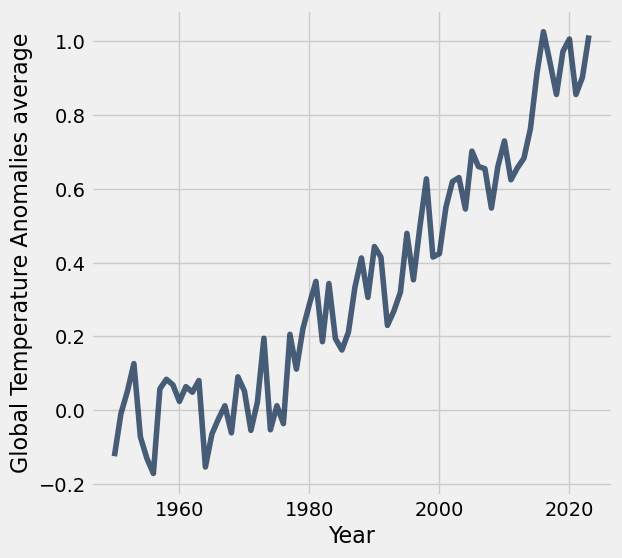

In [23]:
enso_year_anomaly_avg.plot('Year', 'Global Temperature Anomalies average')

# Problem 5

The table fatalities below lists U.S. states and territories alongside the range of
lightning deaths and the exact number of lightning deaths for that state/territory
between 2006 and 2021.

In [8]:
fatalities = Table.read_table("Lightning Deaths in the United States, 2006–2021 .csv")
fatalities

STATE,Rate,Actual Number
Alabama,16 to 30,20
Alaska,None,0
AS,1 to 5,1
Arizona,16 to 30,17
Arkansas,6 to 15,9
California,6 to 15,8
Colorado,16 to 30,24
Connecticut,1 to 5,2
Deleware,None,0
Florida,More than 30,79


Your friend wants to move within the U.S., but they don’t want to move anywhere
with a higher than average (for the U.S.) number of fatal lightning strikes. They’ve
asked you to make a table of places they should consider. The table should have
the same columns as fatalities, ordered from the lowest to highest number of
deaths.

In [50]:
fatalities_average = np.average(fatalities.column('Actual Number'))
possible_dest = fatalities.where("Actual Number", are.below(fatalities_average)).sort("Actual Number")
possible_dest

STATE,Rate,Actual Number
Alaska,None,0
Deleware,None,0
Hawaii,None,0
New Hampshire,None,0
VI,None,0
Washington,None,0
AS,1 to 5,1
GU,1 to 5,1
Idaho,1 to 5,1
Nebraska,1 to 5,1


Your friend also asks you to tell them the percentage of states they should avoid.

In [53]:
percent_to_avoid = ((fatalities.num_rows - possible_dest.num_rows)/fatalities.num_rows) * 100
percent_to_avoid

35.84905660377358

# Problem 6

You are given the table heights below containing the heights of parents and their adult
children. Write some code to find the maximum heights of both sons and daughters
for each mother height at least 65 inches tall. (Hint: your final table should have three
columns, `mother`, `female`, and `male`)

In [10]:
heights = Table().read_table("family_heights.csv")
heights

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [54]:
heights.pivot('sex','mother', 'child', np.max).where('mother', are.above(65))

mother,female,male
65.5,66.5,73
66,68,76
66.2,65.5,72.7
66.5,70.5,73.5
66.7,0,75
67,69.2,73.2
68,70.5,76.5
68.5,66,75
69,70,78
70.5,61.7,71


# Problem 7

You are given a table data below. Answer the following questions.

In [11]:
data = Table().with_columns(
    'Sample', range(1, 11),
    'Green_Button_Conversions', [120, 125, 130, 128, 123, 122, 119, 124, 121, 126],
    'Red_Button_Conversions', [135, 140, 142, 138, 141, 136, 137, 139, 134, 133]
)
data

Sample,Green_Button_Conversions,Red_Button_Conversions
1,120,135
2,125,140
3,130,142
4,128,138
5,123,141
6,122,136
7,119,137
8,124,139
9,121,134
10,126,133


Make a line plot graph with sample being x-axis.

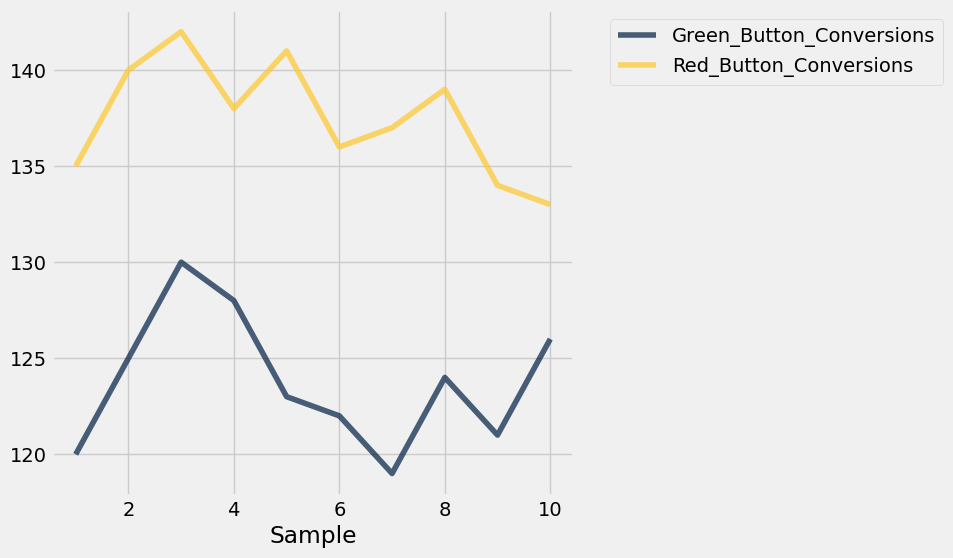

In [55]:
data.plot('Sample', overlay=True)

Make a new table for only `Red Button Conversions` above 130?

In [56]:
selected_data = data.where('Red_Button_Conversions', are.above(130))
selected_data

Sample,Green_Button_Conversions,Red_Button_Conversions
1,120,135
2,125,140
3,130,142
4,128,138
5,123,141
6,122,136
7,119,137
8,124,139
9,121,134
10,126,133


Randomly select a sample of 100 from Green Button Conversions (with replacement).

In [57]:
np.random.choice(data.column('Green_Button_Conversions'), 100)

array([124, 120, 125, 123, 125, 120, 126, 119, 126, 122, 128, 130, 120,
       119, 130, 124, 128, 123, 120, 119, 125, 128, 120, 130, 128, 121,
       121, 128, 119, 126, 121, 130, 123, 130, 120, 130, 130, 122, 126,
       121, 119, 121, 120, 119, 119, 123, 121, 125, 125, 123, 124, 130,
       121, 126, 122, 123, 120, 121, 125, 119, 130, 124, 123, 120, 123,
       122, 121, 122, 124, 125, 125, 124, 120, 123, 130, 120, 125, 125,
       128, 128, 125, 128, 126, 122, 119, 124, 124, 119, 121, 128, 125,
       122, 126, 124, 119, 119, 123, 128, 120, 128])

Create a column in the original data table containing randomly generated values
from 140 to 150.

In [58]:
# Generate random integers between 140 and 150
random_values = np.random.choice(range(140, 151), data.num_rows)

# Add the new column to the table
data = data.with_column('New_Column', random_values).drop('New_Random_Column')
data

Sample,Green_Button_Conversions,Red_Button_Conversions,New_Column
1,120,135,144
2,125,140,144
3,130,142,141
4,128,138,150
5,123,141,147
6,122,136,146
7,119,137,140
8,124,139,144
9,121,134,149
10,126,133,140


Seems like I made a mistake in naming my columns, rename them the columns
into Count, Green, Red and Blue.

In [59]:
data = data.relabeled('Sample', 'Count').relabeled('Green_Button_Conversions', 'Green').relabeled('Red_Button_Conversions', 'Red').relabeled('New_Column', 'Blue')
data

Count,Green,Red,Blue
1,120,135,144
2,125,140,144
3,130,142,141
4,128,138,150
5,123,141,147
6,122,136,146
7,119,137,140
8,124,139,144
9,121,134,149
10,126,133,140


Create a function which will add columns with color names and enter random
integer values from 150 to 200 with each column having values between 150-160,
161-170 and so on until 200.

In [60]:
def add_color_columns(data, color_names, value_ranges):
    for i in range(len(color_names)):
        color = color_names[i]
        value_range = value_ranges[i]
        
        # Generate random integers within the specified range
        random_values = np.random.choice(range(value_range[0], value_range[1] + 1), data.num_rows)
        
        # Add the new color column to the data table
        data = data.with_column(color, random_values)
    
    return data

color_names = ['Yellow', 'Orange', 'Purple', 'Pink', 'Brown']
value_ranges = [(150, 160), (161, 170), (171, 180), (181, 190), (191, 200)]

# Add new color columns with random values
updated_data = add_color_columns(data, color_names, value_ranges)

updated_data

Count,Green,Red,Blue,Yellow,Orange,Purple,Pink,Brown
1,120,135,144,154,166,171,189,197
2,125,140,144,158,165,177,182,200
3,130,142,141,158,168,179,187,192
4,128,138,150,154,166,177,189,200
5,123,141,147,157,163,176,187,191
6,122,136,146,154,163,178,184,200
7,119,137,140,150,167,173,188,191
8,124,139,144,153,166,178,182,192
9,121,134,149,155,166,173,187,191
10,126,133,140,152,161,180,188,195


# Problem 8 

You are given the table `accessories` below related to Animal Crossing.

In [61]:
accessories = Table().read_table("accessories.csv")
accessories

Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Size,Miles Price,Source,Source Notes,Seasonal Availability,Mannequin Piece,Version,Style,Label Themes,Type,Villager Equippable,Catalog,Filename,Internal ID,Unique Entry ID
3D glasses,White,No,490,122,White,Colorful,1x1,nan,Able Sisters,Available from Able Sisters shop only,All Year,No,1.0.0,Active,party,AccessoryEye,Yes,For sale,AccessoryGlassThreed0,4463,FNxEraBTeWRiCvtFu
3D glasses,Black,No,490,122,Black,Colorful,1x1,nan,Able Sisters,Available from Able Sisters shop only,All Year,No,1.0.0,Active,party,AccessoryEye,Yes,For sale,AccessoryGlassThreed1,11020,mM9SXPCcGPfPJAmtm
bandage,Beige,No,140,35,Beige,White,1x1,nan,Able Sisters,Available from either Mable's temporary shop or Able Sis ...,All Year,Yes,1.0.0,Active,outdoorsy; comfy; sporty,AccessoryMouth,No,For sale,AccessoryMouthBandageSkin,4677,2qFT5iPkk8bREvpkj
beak,Yellow,No,490,122,Yellow,Yellow,1x1,nan,Able Sisters,Available from either Mable's temporary shop or Able Sis ...,All Year,Yes,1.0.0,Cute,fairy tale; party; theatrical,AccessoryMouthInvisibleNose,No,For sale,AccessoryMouthBeakYellow,3549,T5CpsJi4xBSachNL5
birthday shades,Yellow,No,NFS,620,Yellow,Red,1x1,nan,Birthday,nan,All Year,No,1.0.0,Gorgeous,party,AccessoryEye,Yes,Not for sale,AccessoryGlassBirthday0,4510,S6CiB9ZvzBTMhEnDz
birthday shades,Pink,No,NFS,620,Pink,Pink,1x1,nan,Birthday,nan,All Year,No,1.0.0,Gorgeous,party,AccessoryEye,Yes,Not for sale,AccessoryGlassBirthday1,11217,g3MPcmAKM4z5h8KYX
birthday shades,Red,No,NFS,620,Red,Pink,1x1,nan,Birthday,nan,All Year,No,1.0.0,Gorgeous,party,AccessoryEye,Yes,Not for sale,AccessoryGlassBirthday2,11218,ojXoAAj8Bs2XgRiWB
birthday shades,Blue,No,NFS,620,Light blue,Green,1x1,nan,Birthday,nan,All Year,No,1.0.0,Gorgeous,party,AccessoryEye,Yes,Not for sale,AccessoryGlassBirthday3,11219,Yr9mRJaZM44554oTS
bottom-rimmed glasses,Red,No,1100,275,Red,Red,1x1,nan,Able Sisters,Available from Able Sisters shop only,All Year,No,1.0.0,Simple,everyday; comfy; work,AccessoryEye,Yes,For sale,AccessoryGlassLoose0,4597,ZHqtvcoqqDpJLf9Pc
bottom-rimmed glasses,Purple,No,1100,275,Purple,Purple,1x1,nan,Able Sisters,Available from Able Sisters shop only,All Year,No,1.0.0,Simple,everyday; comfy; work,AccessoryEye,Yes,For sale,AccessoryGlassLoose1,11081,akRhFD3qeJEPM7WiD


We want to know whether `party` or `comfy` is more popular in the `Label Themes` column.
Write some code to find the percentage of `Label Themes` that contain `party` and the
percentage of `Label Themes` that contain `comfy`.

In [66]:
size = accessories.num_rows
party = accessories.where('Label Themes',are.containing('party')).num_rows
comfy = accessories.where('Label Themes',are.containing('comfy')).num_rows

percent_party = party/size*100
percent_comfy = comfy/size*100

percent_party, percent_comfy

(44.14414414414414, 24.774774774774773)

# Problem 9

The table `wages by education` below shows hourly wages by race, gender, and education
level. *NOTE* This is a large table, so not all columns are shown.

In [67]:
wages_by_education=Table().read_table('wages_by_education.csv')
wages_by_education

year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree,white_less_than_hs,white_high_school,white_some_college,white_bachelors_degree,white_advanced_degree,black_less_than_hs,black_high_school,black_some_college,black_bachelors_degree,black_advanced_degree,hispanic_less_than_hs,hispanic_high_school,hispanic_some_college,hispanic_bachelors_degree,hispanic_advanced_degree,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelors_degree,white_men_advanced_degree,black_men_less_than_hs,black_men_high_school,black_men_some_college,black_men_bachelors_degree,black_men_advanced_degree,hispanic_men_less_than_hs,hispanic_men_high_school,hispanic_men_some_college,hispanic_men_bachelors_degree,hispanic_men_advanced_degree,white_women_less_than_hs,white_women_high_school,white_women_some_college,white_women_bachelors_degree,white_women_advanced_degree,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
2022,16.52,21.94,24.81,41.6,53.22,17.99,24.08,27.96,49.01,63.51,14.33,18.93,21.76,34.39,44.34,15.7,23.31,26.28,43.3,53.3,15.19,19.39,21.34,33.39,44.67,17.32,20.72,22.96,36,48.3,17.14,25.92,29.93,51.23,63.86,16.38,20.73,22.58,37.63,52.91,18.67,22.32,25.49,41.48,57.08,13.84,19.56,22.52,35.31,44.45,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,63.52,14.36,19.36,21.97,35.08,44.8,16.2,23.6,26.29,43.06,53.62,14.55,19.66,21.26,32.62,43.37,17.6,21.03,23.34,35.26,48.6,18.13,26.03,29.79,50.06,64.04,15.38,20.86,22.63,36.95,49.01,18.98,22.7,25.58,39.61,55.6,13.77,20.08,22.73,36.11,44.82,13.73,18.3,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,17.02,22.7,25.44,41.65,53.74,18.76,25.09,28.55,48.15,62.7,14.4,19.35,22.35,35.41,46.04,17.01,24,26.9,43.16,53.8,14.55,19.66,21.79,33.64,45.76,17.61,21.46,23.24,36.13,48.58,18.97,26.73,30.4,50.15,63.5,15.52,21.22,23.57,36.7,51.67,19.26,23.33,25.69,41,53.58,14.2,20.06,23.31,36.2,45.58,13.66,17.93,20.31,31.38,42.44,14.58,18.5,20.69,31.55,44.15
2019,16.11,21.64,24,39.61,51.57,17.55,23.99,26.99,45.74,59.93,13.96,18.48,21.09,33.8,44.22,15.89,22.94,25.47,41.06,51.81,14.19,18.73,20.44,31.83,42.73,16.71,20.47,22.01,34.66,46.69,17.66,25.58,28.9,47.76,60.84,15.07,20.22,22.02,33.73,46.87,17.93,22.33,24.35,39.56,52.24,13.44,19.22,21.99,34.47,43.83,13.3,17.18,19.17,30.31,40.42,14.5,17.71,19.69,30.18,42.3
2018,15.94,21.5,23.7,38.87,51.03,17.7,23.72,26.61,44.97,59.73,13.36,18.49,20.91,33.03,43.19,16.05,23.02,25.15,40.49,51.8,13.31,18.14,19.98,32,42.22,16.44,20.13,21.74,33.19,44.83,17.96,25.49,28.41,47.28,61.27,14.27,19.36,21.82,33.42,46.42,18.05,22.04,24.2,37.27,51.27,13.45,19.52,21.9,33.78,43.31,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35
2017,15.92,21.26,23.31,38.65,49.4,17.63,23.47,25.91,44.5,56.77,13.39,18.31,20.83,33.01,42.75,15.96,22.71,24.65,40.07,50.03,13.93,17.94,19.8,31.49,40.68,16.34,19.83,21.59,33.07,43.92,17.82,25.14,27.61,46.44,57.64,15,19.46,21.09,34.41,44.62,17.91,21.68,23.59,36.62,50.58,13.46,19.34,21.72,33.76,43.22,12.99,16.33,18.76,29.19,38.26,13.36,17.02,19.6,29.69,38.43
2016,15.45,21,23.35,38.73,49.64,16.95,23.01,25.98,44.98,57.71,13.11,18.33,20.89,32.66,42.17,15.38,22.37,24.61,39.95,49.85,13.48,17.95,20.28,32.1,41.26,16.02,19.47,21.33,34.28,43.92,16.96,24.73,27.49,46.78,58.13,14.64,19.07,22.15,35.36,45.54,17.37,21.05,23.43,38.94,50.81,12.98,19.21,21.83,33.23,42.24,12.42,16.71,18.88,29.56,38.55,13.4,17.11,19.26,29.41,37.77
2015,15.25,20.81,23.17,37.96,48.42,16.63,22.93,25.99,43.47,56.32,13.09,18.05,20.54,32.54,41.16,15.34,22.12,24.52,39.19,49,13.64,17.62,1

Make a table with only hourly wages made by women without high school education for woman, separated by races in the table (White, Black, Hispanic). The table should only contain years between 2010 and 2022 (inclusive).

In [68]:
Less_than_HS_Woman_Wages=wages_by_education.select('year','white_women_less_than_hs','black_women_less_than_hs',
                                                   'hispanic_women_less_than_hs').where('year',are.between_or_equal_to(2010,2022))
Less_than_HS_Woman_Wages

year,white_women_less_than_hs,black_women_less_than_hs,hispanic_women_less_than_hs
2022,13.84,13.89,14.74
2021,13.77,13.73,14.97
2020,14.2,13.66,14.58
2019,13.44,13.3,14.5
2018,13.45,12.48,13.47
2017,13.46,12.99,13.36
2016,12.98,12.42,13.4
2015,12.68,12.79,13.42
2014,12.54,12.47,12.61
2013,12.47,12.41,12.8


Make line plot of the data.

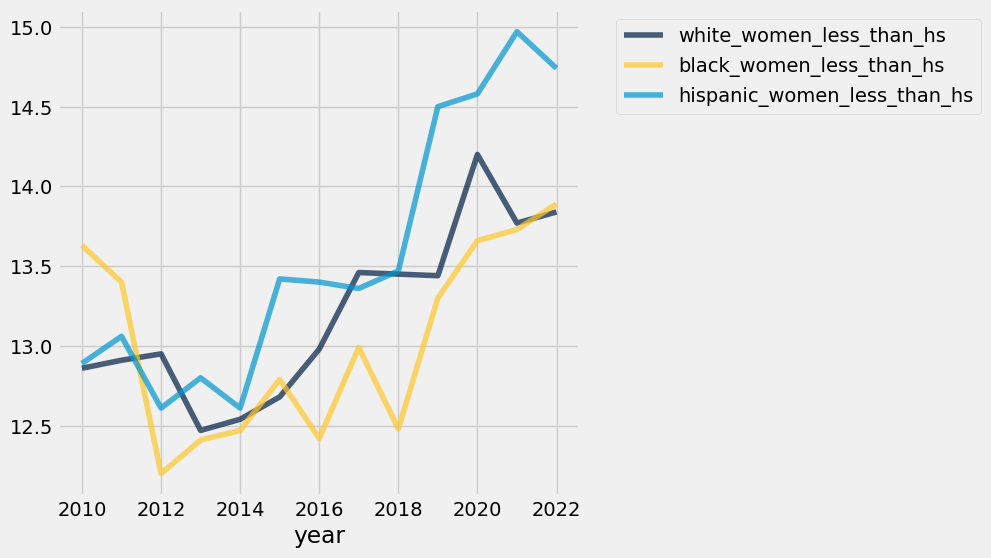

In [70]:
Less_than_HS_Woman_Wages.plot('year')

# Problem 10

The table `hits unsorted` is shown below. *NOTE* this table is large, so not all columns
are shown.

In [71]:
hits_unsorted= Table.read_table('songs_normalize.csv')
hits_unsorted

artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3,1.77e-05,0.355,0.894,95.053,pop
blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0,0.612,0.684,148.726,"rock, pop"
Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.029,0.173,0,0.251,0.278,136.859,"pop, country"
Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,1.35e-05,0.347,0.544,119.992,"rock, metal"
*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.00104,0.0845,0.879,172.656,pop
Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.119,9.64e-05,0.07,0.714,121.549,"hip hop, pop, R&B"
Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0,0.0454,0.76,104.504,hip hop
Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0,0.467,0.861,103.035,"pop, rock"
Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.102,0.273,0,0.149,0.734,138.009,"pop, R&B"
Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.72,0.808,6,-5.627,1,0.0379,0.00793,0.0293,0.0634,0.869,126.041,Dance/Electronic


Create a table called hits with only the columns `artist`, `song`, `year`, and `popularity`.

In [73]:
hits = hits_unsorted.select('artist','song','year',"popularity")
hits

artist,song,year,popularity
Britney Spears,Oops!...I Did It Again,2000,77
blink-182,All The Small Things,1999,79
Faith Hill,Breathe,1999,66
Bon Jovi,It's My Life,2000,78
*NSYNC,Bye Bye Bye,2000,65
Sisqo,Thong Song,1999,69
Eminem,The Real Slim Shady,2000,86
Robbie Williams,Rock DJ,2000,68
Destiny's Child,Say My Name,1999,75
Modjo,Lady - Hear Me Tonight,2001,77


Write some code to display the most popular song in the table.

In [76]:
hits.sort('popularity',descending=True).take(0)

artist,song,year,popularity
The Neighbourhood,Sweater Weather,2013,89


Write a function that takes a year, and returns the most popular song in that
year and its artist.

In [82]:
def most_popular_by_year (year):
    hits_for_year=hits.where('year',year)
    hits_for_year_sorted=hits_for_year.sort('popularity',descending=True)
    most_pop= hits_for_year_sorted.take(0)
    artist= most_pop.column('artist').item(0)
    song= most_pop.column('song').item(0)
    return print(f'Most popular in {year}  was {song} by {artist}')
    
most_popular_by_year(2013)

Most popular in 2013  was Sweater Weather by The Neighbourhood


Apply your `most_popular_by_year` function to every year in the dataset.

In [83]:
hits.group('year').apply(most_popular_by_year,'year')

Most popular in 1998  was Hot Boyz by Missy Elliott
Most popular in 1999  was The Next Episode by Dr. Dre
Most popular in 2000  was The Real Slim Shady by Eminem
Most popular in 2001  was The Middle by Jimmy Eat World
Most popular in 2002  was Without Me by Eminem
Most popular in 2003  was In Da Club by 50 Cent
Most popular in 2004  was Yeah! (feat. Lil Jon & Ludacris) by Usher
Most popular in 2005  was Feel Good Inc. by Gorillaz
Most popular in 2006  was Promiscuous by Nelly Furtado
Most popular in 2007  was The Way I Are by Timbaland
Most popular in 2008  was Heartless by Kanye West
Most popular in 2009  was Empire State Of Mind by JAY-Z
Most popular in 2010  was Love The Way You Lie by Eminem
Most popular in 2011  was Paradise by Coldplay
Most popular in 2012  was Locked out of Heaven by Bruno Mars
Most popular in 2013  was Sweater Weather by The Neighbourhood
Most popular in 2014  was The Nights by Avicii
Most popular in 2015  was Wait a Minute! by WILLOW
Most popular in 2016  was 

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)